In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from tqdm import tqdm
from mix_Network import *
from Event import Event
from Tools import LoadObject, EuclidianNorm, NormalizedNorm, BattachaNorm

# Load Clustering, Training and Testing data

# Defining the Network 

In [3]:
hots = network(algo='lagorce', krnlinit='first', tau=0.00002)

# Training the Cluster on 5 images

In [4]:
hots.learn(diginit=True)

100%|██████████| 223371/223371 [06:08<00:00, 605.62it/s] 


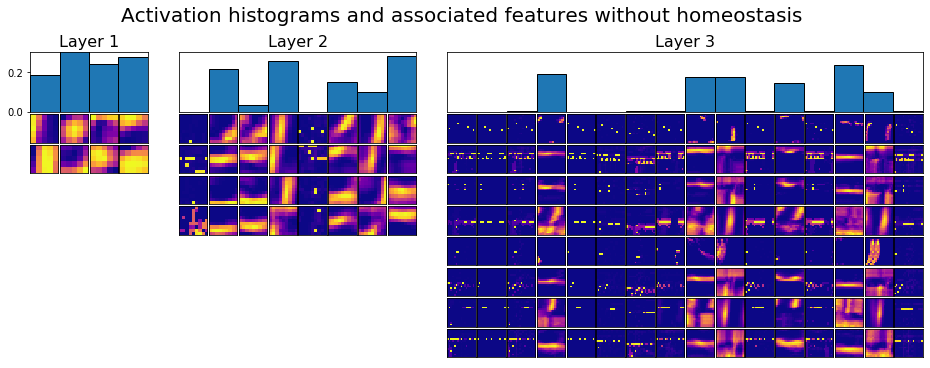

In [5]:
hots.plotlayer()

# Running the Network on training samples

In [6]:
labmap = hots.labelhisto(diginit=True)

100%|██████████| 520844/520844 [10:21<00:00, 838.29it/s] 


In [7]:
testmap = hots.testhisto(diginit=True)

100%|██████████| 558235/558235 [10:41<00:00, 870.16it/s] 


# Runing the Network on testing samples

In [9]:
hots.runall(nb_digit=40, diginit=True)

['X', 'F', 'Y', 'G', 'Z', 'H', '0', 'I', '1', 'J', '2', 'K', '3', 'L', '4', 'M', '5', 'N', '6', 'O', '7', 'P', '8', 'Q', '9', 'R', 'S', 'A', 'T', 'B', 'U', 'C', 'V', 'D', 'W', 'E', 'X', 'F', 'Y', 'G']


100%|█████████▉| 14019/14020 [00:13<00:00, 1029.08it/s]


# Classifying

In [8]:
def EuclidianNorm(hist1,hist2):
    return np.linalg.norm(hist1,hist2)

def NormalizedNorm(hist1,hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return np.linalg.norm(hist1,hist2)/(np.linalg.norm(hist1)*np.linalg.norm(hist2))

def BattachaNorm(hist1, hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return -np.log(np.sum(np.sqrt(hist1*hist2)))

for i in range(len(testmap)):
    dist = 100
    for k in range(len(labmap)):
        if BattachaNorm(testmap[i][1],labmap[k][1])<dist:
            dist = BattachaNorm(testmap[i][1],labmap[k][1])
            symb = labmap[k][0]
    print(symb, testmap[i][0])

    

W X
E F
E Y
E G
E Z
E H
E 0
E I
E 1
E J
E 2
E K
E 3
E L
E 4
E M
E 5
E N
E 6
E O
E 7
E P
E 8
E Q
E 9
E R
E S
E A
E T
E B
E U
E C
E V
E D
E W
E E
E X
E F
E Y
